In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from project import handling_missing_values, LabelEncoder

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
neighborhoods = set(data.Neighborhood)

couldnt find geospatial data to plot the neighborhoods by

but we can still analyze them!

In [6]:
neighborhood_lengths = []
for neighborhood in neighborhoods:
    neighborhood_length = len(data[data.Neighborhood == neighborhood])
    neighborhood_lengths.append((neighborhood, neighborhood_length))

In [7]:
neighborhoods_sorted = []
for pair in sorted(neighborhood_lengths, key=lambda x: x[1], reverse=True):
    neighborhoods_sorted.append(pair[0])

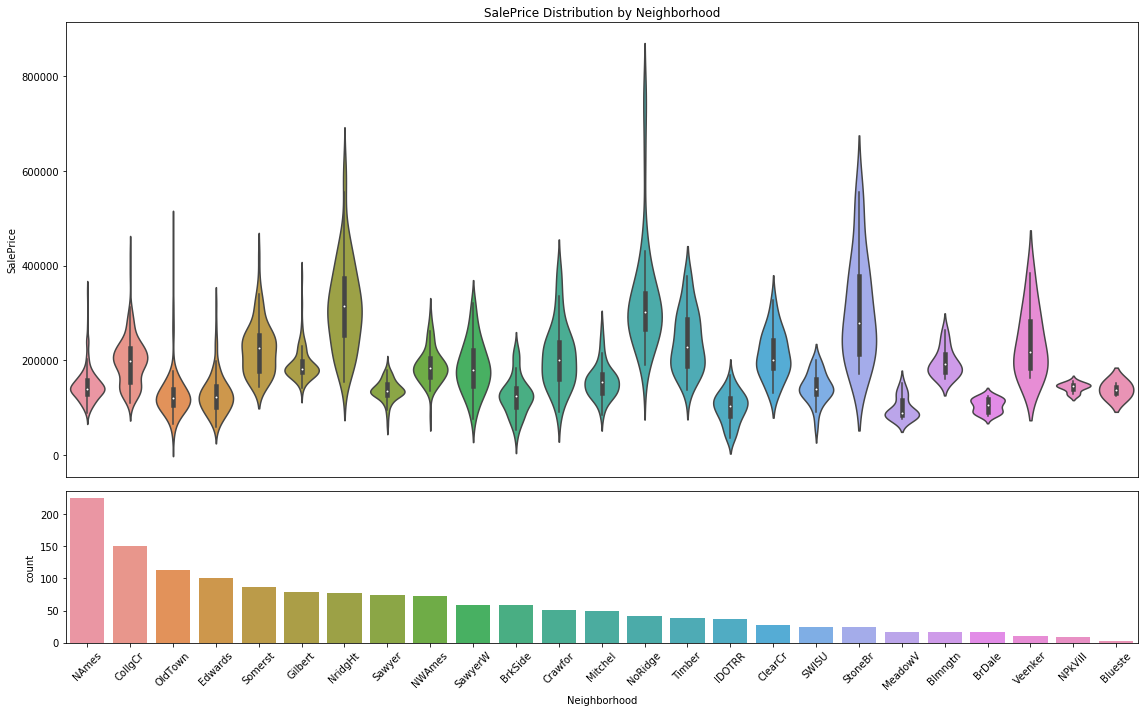

In [43]:
fig, ax = plt.subplots(2,1, figsize=(16,10),
                      gridspec_kw={'height_ratios': [3, 1]})
sns.violinplot(x='Neighborhood', y='SalePrice', data=data, scale='width', ax=ax[0], order=neighborhoods_sorted)
ax[0].title.set_text('SalePrice Distribution by Neighborhood')
ax[0].set_xticks([])
ax[0].set_xlabel('')
sns.countplot(x ='Neighborhood', data=data, ax=ax[1], order=neighborhoods_sorted)
plt.xticks(rotation=45);
plt.tight_layout()

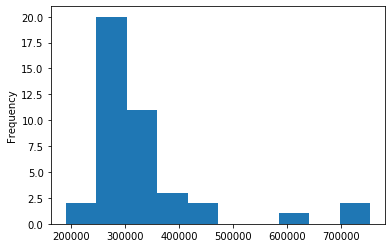

In [46]:
data[data.Neighborhood == 'NoRidge'].SalePrice.plot(kind='hist')

In [53]:
set(data.YrSold)

{2006, 2007, 2008, 2009, 2010}

In [52]:
data[data.SalePrice > 600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [9]:
neighborhood_features = pd.read_csv('feature_dataframe.csv', index_col=0)

In [58]:
neighborhood_features.head(20)

,CollgCr,Veenker,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,Sawyer,...,MeadowV,Edwards,Timber,Gilbert,StoneBr,ClearCr,NPkVill,Blmngtn,BrDale,SWISU
0,GrLivArea,1stFlrSF,OverallQual,OverallQual,FireplaceQu,MSSubClass,GrLivArea,GrLivArea,HouseStyle_1Story,GarageType,...,LotArea,TotalBsmtSF,TotalBsmtSF,TotalBsmtSF,YearRemodAdd,BsmtQual,OpenPorchSF,1stFlrSF,HeatingQC,2ndFlrSF
1,FullBath,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,LotArea,YearBuilt,Heating_Grav,GrLivArea,FireplaceQu,...,FireplaceQu,GrLivArea,YearRemodAdd,2ndFlrSF,MasVnrType_None,LotArea,YrSold,TotalBsmtSF,MasVnrArea,BedroomAbvGr
2,OverallQual,OverallCond,GrLivArea,1stFlrSF,TotalBsmtSF,GrLivArea,YearRemodAdd,OverallQual,TotalBsmtSF,1stFlrSF,...,GarageFinish,YearBuilt,YrSold,GrLivArea,MasVnrArea,TotalBsmtSF,MoSold,BsmtExposure,OpenPorchSF,OverallQual
3,GarageArea,FullBath,YearRemodAdd,TotalBsmtSF,YearBuilt,BsmtFinSF1,FireplaceQu,LotArea,PavedDrive,TotRmsAbvGrd,...,Fireplaces,ExterCond,GrLivArea,BsmtFinType1,LotArea,WoodDeckSF,BsmtUnfSF,GarageArea,YrSold,TotalBsmtSF
4,MasVnrType_Stone,Exterior1st_Plywood,LotFrontage,BsmtFinSF1,LotArea,TotalBsmtSF,OverallCond,GarageArea,LotArea,WoodDeckSF,...,GrLivArea,FullBath,GarageArea,YearRemodAdd,TotalBsmtSF,BsmtFinSF1,GarageYrBlt,BsmtFinSF1,MoSold,Condition1_Norm
5,MasVnrArea,BsmtUnfSF,LandSlope,GarageArea,MSSubClass,BsmtUnfSF,OverallQual,1stFlrSF,GarageCars,GarageArea,...,BsmtFinType1,YearRemodAdd,MasVnrArea,YearBuilt,BldgType_TwnhsE,GrLivArea,BsmtFinSF1,YrSold,Exterior2nd_HdBoard,PavedDrive
6,BsmtFinSF1,BsmtFullBath,TotalBsmtSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,BldgType_Duplex,Fireplaces,1stFlrSF,YearBuilt,...,MoSold,GarageType,1stFlrSF,BsmtFinSF1,GarageArea,YrSold,TotalBsmtSF,LotArea,SaleCondition,TotRmsAbvGrd
7,YearBuilt,BedroomAbvGr,BsmtFinSF1,MasVnrArea,BsmtFinType1,KitchenQual,GarageArea,FireplaceQu,OverallQual,BsmtFinSF1,...,OverallQual,CentralAir,BsmtFinSF2,MasVnrArea,TotRmsAbvGrd,TotRmsAbvGrd,ScreenPorch,KitchenQual,BsmtUnfSF,EnclosedPorch
8,TotRmsAbvGrd,KitchenQual,BsmtUnfSF,OpenPorchSF,BsmtQual,1stFlrSF,BsmtFullBath,OverallCond,TotRmsAbvGrd,GarageFinish,...,1stFlrSF,BsmtCond,2ndFlrSF,WoodDeckSF,GrLivArea,Exterior1st_Plywood,1stFlrSF,OverallQual,WoodDeckSF,HeatingQC
9,BsmtQual,ScreenPorch,Fence,YearRemodAdd,Fireplaces,GarageArea,KitchenAbvGr,TotalBsmtSF,LotFrontage,Exterior1st_HdBoard,...,BsmtFinSF1,KitchenQual,Foundation_PConc,GarageArea,1stFlrSF,FireplaceQu,MSSubClass,OpenPorchSF,GrLivArea,HouseStyle_1Story


In [21]:
def top_n_features_for_all_neighborhoods(n):
    return neighborhood_features.iloc[:n, :].stack().value_counts()

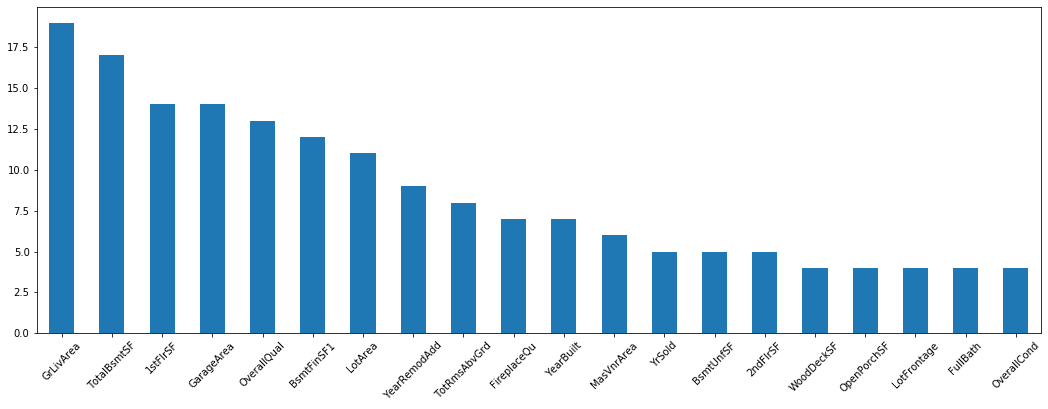

In [60]:
plt.figure(figsize=(18,6))
top_n_features_for_all_neighborhoods(10)[:20].plot(kind='bar')
plt.xticks(rotation=45);